# Model Training 


* 1.1 Importing Data and Required Packages

*  importing Pandas, NUmpy, Matplotlib,Seaborn,and Warnings Library.

In [4]:
# Basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import warnings


Importing the CSV Data as Pandas DataFrame

In [6]:
df = pd.read_csv("Data/stud.csv")

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


* Splitting the data into independent and independent features

In [8]:
X = df.drop(columns=["math_score"],axis = 1)

In [9]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
print("Categories in 'gender variable:     ",end = " ")
print(df["gender"].unique())
print("\n\n")
print("Caregories in  'race/ethnicity' variable:     ",end = "")
print(df["race_ethnicity"].unique())
print("\n\n")
print("Categories in 'parental level of education' variable : ",end = " ")
print(df["parental_level_of_education"].unique())
print("\n\n")
print("Categories in 'test preparation course' variable:   ",end = " ")
print(df["test_preparation_course"].unique())

Categories in 'gender variable:      ['female' 'male']



Caregories in  'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']



Categories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']



Categories in 'test preparation course' variable:    ['none' 'completed']


In [11]:
y = df["math_score"]

In [12]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [13]:
# Create the ColumnTransformer

numerical_feature = X.select_dtypes(exclude = "object").columns
categorical_feature = X.select_dtypes(include = "object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder()
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",encoder,categorical_feature),
        ("Standardization",scaler,numerical_feature)
    ]
)


In [14]:
X = preprocessor.fit_transform(X)

In [21]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [15]:
X.shape

(1000, 19)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

* Creating an Evalute Function to give all metrics after model Training


In [17]:
def evalute_score(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    r2_square = r2_score(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    return mae,mse,r2_square,rmse

In [20]:
models = {
    "Linear Regressionn": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbours Regressor" : KNeighborsRegressor(),
    "Random Forest Regressor" : DecisionTreeRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i] # selecting the model at each iteration
    model.fit(X_train,y_train) #training the model

    #Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_r2_score,model_train_rmse = evalute_score(y_train,y_train_pred)

    model_test_mae, model_test_mse, model_test_r2_score,model_test_rmse = evalute_score(y_test,y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    # print result of each model 
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2_score))
    r2_list.append(model_test_r2_score)
    
    print('='*35)
    print('\n')




Linear Regressionn
Linear Regressionn
Model performance for Training set
- Root Mean Squared Error: 5.3240
- Mean Absolute Error: 4.2691
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3773
- Mean Absolute Error: 4.2053
- R2 Score: 0.8812


Lasso
Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbours Regressor
K-Neighbours Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7133
- Mean Absolute 

In [23]:
res = pd.DataFrame(list(zip(model_list,r2_list)),columns = ["Model_name","R2_Score"]).sort_values(by = ["R2_Score"],ascending = False)

In [24]:
res

,Model_name,R2_Score
0,Linear Regressionn,0.881171
2,Lasso,0.880593
5,Ridge,0.849596
1,Linear Regressionn,0.825320
3,Lasso,0.784066
4,Ridge,0.741779


* From the above results Linear Regression model is working well with our data for predicitions


* Again retrain the Linear Regression Model

In [25]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)



LinearRegression()

In [29]:
y_train_pred = lin_model.predict(X_train)
y_test_pred = lin_model.predict(X_test)

In [30]:
 model_train_mae, model_train_mse, model_train_r2_score,model_train_rmse = evalute_score(y_train,y_train_pred)
 model_test_mae, model_test_mse, model_test_r2_score,model_test_rmse = evalute_score(y_test,y_test_pred)

In [31]:
model_train_r2_score

0.8742744782693375

In [32]:
model_test_r2_score

0.8811710947341137

* fine it's working with our models 

* lets visualize prediction by plotting in graph

Text(0, 0.5, 'predicted')

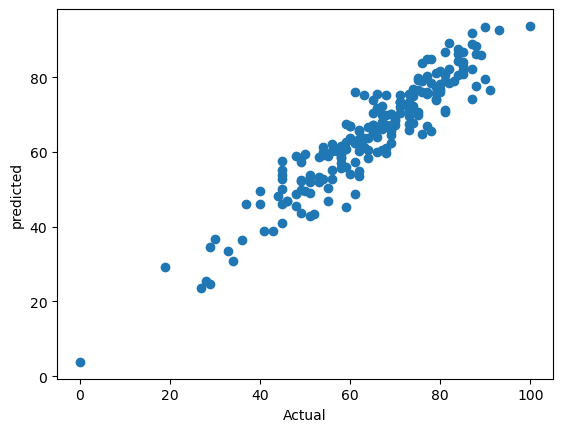

In [44]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")

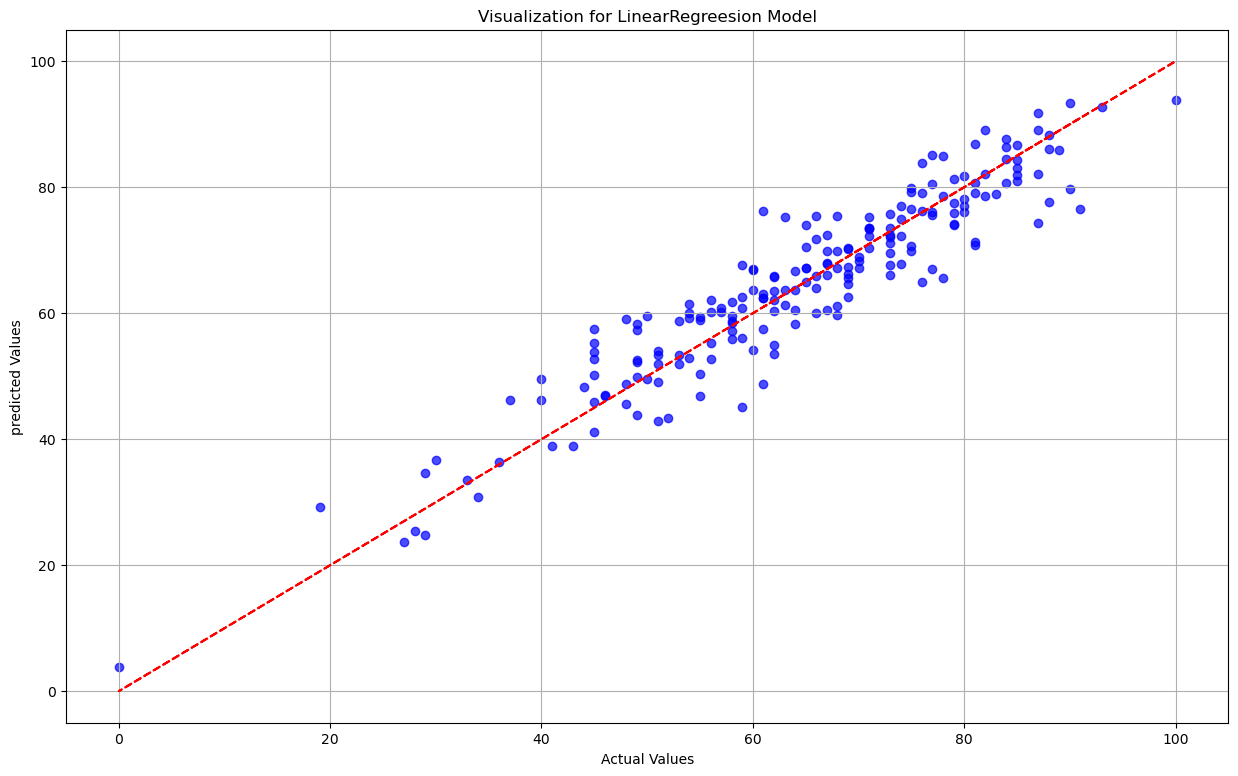

In [63]:
plt.figure(figsize = (15,9))
plt.scatter(y_test,y_test_pred,color = 'blue', alpha=0.7)
plt.plot(y_test,y_test,color = "red",linestyle='--')
plt.title("Visualization for LinearRegreesion Model")
plt.xlabel("Actual Values")
plt.ylabel("predicted Values")
plt.grid()
plt.show()

* The dotted line is original values and scatter are our predicted values 

In [67]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.796875,-5.796875
740,80,76.976562,3.023438
660,74,76.984375,-2.984375
411,84,87.664062,-3.664062
...,...,...,...
408,52,43.367188,8.632812
332,62,62.156250,-0.156250
208,74,67.812500,6.187500
613,65,67.125000,-2.125000
